In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import scienceplots
from matplotlib.font_manager import FontProperties
from matplotlib.gridspec import GridSpec

plt.style.use(['science', 'muted'])
plt.rcParams.update({'font.size': 17})

In [2]:
check_col = lambda s: s.endswith("MIN") or s.endswith("MAX")

In [3]:
def rename_col(col):
    out = ""
    if "etl" in col:
        out = "easy-to-learn"
    elif "amb" in col:
        out = "ambiguous"
    elif "htl" in col:
        out = "hard-to-learn"
    elif "full" in col:
        return "no curriculum"
    
    if "chia" in col:
        out = f"{out} (CHIA)"
    elif "inv_ppl" in col or "ip" in col:
        out = f"{out} (Inv PPL)"
    elif "bleu" in col or "bl" in col:
        out = f"{out} (BLEU)"
        
    return out

In [4]:
def linestyle_getter(col_name):
    styles = ['-', ':', '--', '-.']
    if "CHIA" in col_name:
        return styles[0]
    elif "Inv PPL" in col_name:
        return styles[1]
    elif "BLEU" in col_name:
        return styles[2]
    elif col_name == "no curriculum":
        return styles[3]

In [17]:
def curriculum_plot(csv_name):
    df = pd.read_csv(csv_name)
    columns = df.columns
    columns = [col for col in columns if check_col(col)]
    df = df.drop(columns, axis=1)

    steps = df["Step"].tolist()
    df = df.drop(["Step"], axis=1)
    
    new_cols = {col:rename_col(col) for col in df.columns}
    df = df.rename(columns=new_cols)

    fig = plt.figure(figsize=(11, 5))
    gs = GridSpec(1, 10, figure=fig)

    
    # Plot the data on the main subplot
    ax_main = fig.add_subplot(gs[0, :7])
    
    for col in df.columns:
        acc = df[col].tolist()
        ax_main.plot(steps, acc, label=r"\textit{"+col+"}", linewidth=2.2, linestyle=linestyle_getter(col))  # Plot some data on the axes.
        
    handles, labels = ax_main.get_legend_handles_labels()

    # Create an empty subplot for the legend
    ax_legend = fig.add_subplot(gs[0, 7:])

    # Add the legend to the empty subplot
    ax_legend.legend(handles, labels, loc='center', fontsize=15)
    ax_legend.axis('off')

    # Adjust the spacing between the subplots
    gs.update(wspace=1)
    
    ax_main.set_xlabel('Steps')  # Add an x-label to the axes.
    ax_main.set_ylabel('Test Accuracy')  # Add a y-label to the axes.
    plt.savefig(csv_name.split(".")[0] + "_plot.pdf", format="pdf", bbox_inches='tight')

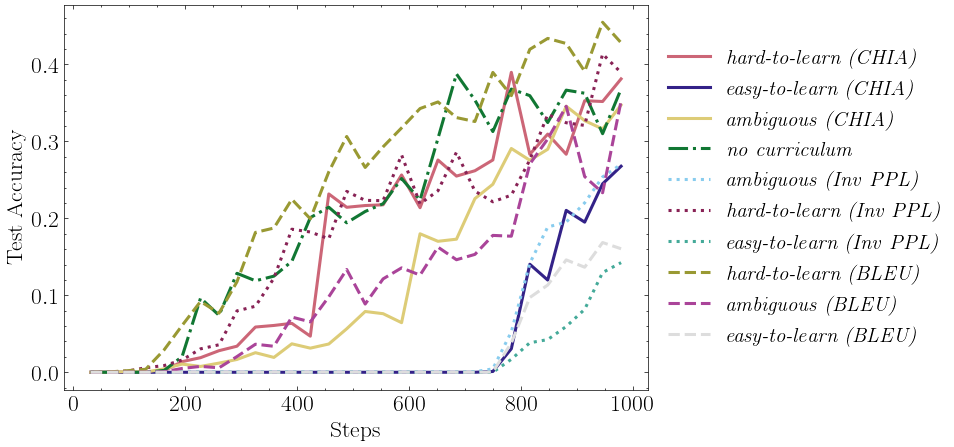

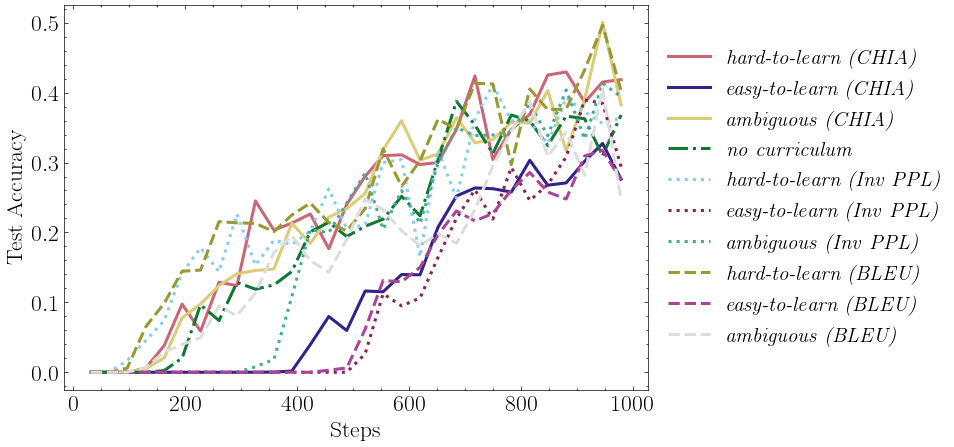

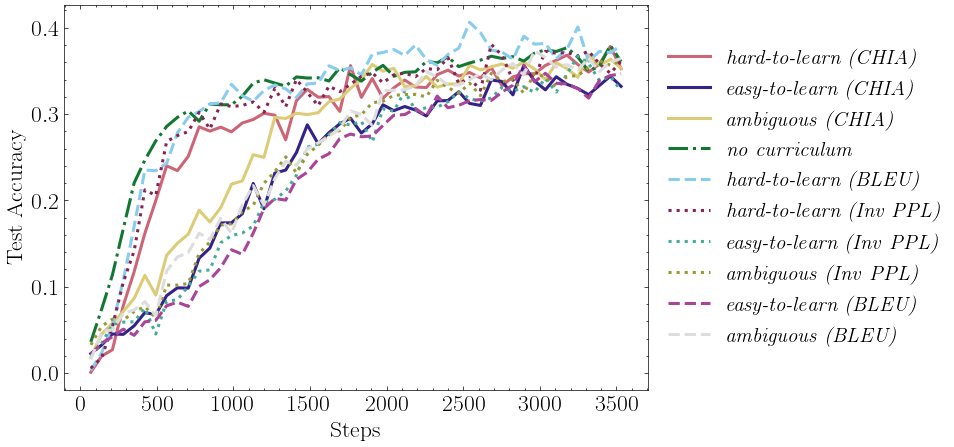

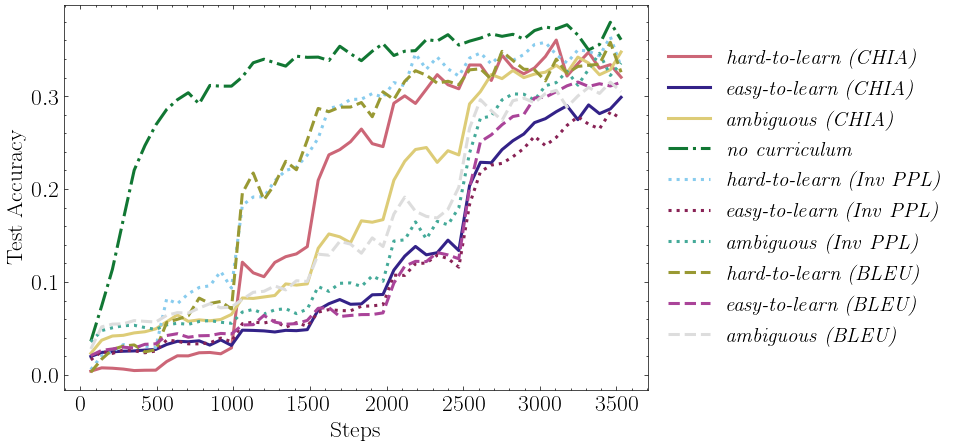

In [18]:
from glob import glob

for name in glob("*.csv"):
    curriculum_plot(name)